In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, wilcoxon
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read data

In [156]:
data = pd.read_csv(r'reaction_times.csv')
data.iloc[:, -4:] = np.nan

colList = data.columns.values

In [157]:
for _idx, row in data.iterrows():
    congruent_vals_list  = []
    incongruent_vals_list = []
    
    congruent_accScores_list   = []
    incongruent_accScores_list = []

    #* itterating over reaction time recordingn with obs_colIndex (shared accross column indices)
    for obs_colIndex in range(1, 21):
        # Congruent data branch
        if row[f"trial_type{obs_colIndex}"] == True and row[f"accuracy{obs_colIndex}"] == "Correct":
            congruent_vals_list.append(row[f"rt{obs_colIndex}"])
            congruent_accScores_list.append(1)

        # Incongruent data branch
        elif row[f"trial_type{obs_colIndex}"] == False and row[f"accuracy{obs_colIndex}"] == "Correct":
            incongruent_vals_list.append(row[f"rt{obs_colIndex}"])
            incongruent_accScores_list.append(1)

    
    data.loc[_idx, 'avg_congruent'] = np.mean(congruent_vals_list) if congruent_accScores_list else 0.0
    data.loc[_idx, 'avg_incongruent'] = np.mean(incongruent_vals_list) if incongruent_accScores_list else 0.0
    data.loc[_idx, 'acc_congruent'] = np.sum(congruent_accScores_list)/20
    data.loc[_idx, 'acc_incongruent'] = np.sum(incongruent_accScores_list)/20

# Split into control and exercise group

In [158]:
execise = data[data["group"] == "exercise"]
control = data[data["group"] == "control"]

In [ ]:
exercise_1 = execise[execise["trial"] == 1]
exercise_2 = execise[execise["trial"] == 2]
control_1 = control[control["trial"] == 1]
control_2 = control[control["trial"] == 2]

# get mean rt and acc for whole group

In [150]:
rt_exercise_1 = np.mean(exercise_1["avg_incongruent"])
rt_exercise_2 = np.mean(exercise_2["avg_incongruent"])
rt_control_1 = np.mean(control_1["avg_incongruent"])
rt_control_2 = np.mean(control_2["avg_incongruent"])

In [151]:
rt_exercise_11 = np.mean(exercise_1["avg_congruent"])
rt_exercise_22 = np.mean(exercise_2["avg_congruent"])
rt_control_11 = np.mean(control_1["avg_congruent"])
rt_control_22 = np.mean(control_2["avg_congruent"])

In [152]:
exerc = [rt_exercise_1, rt_exercise_2]
contr = [rt_control_1, rt_control_2]

In [153]:
exercc = [rt_exercise_11, rt_exercise_22]
contrr = [rt_control_11, rt_control_22]

Text(0.5, 1.0, 'Reaction time Incongruent by group and trial')

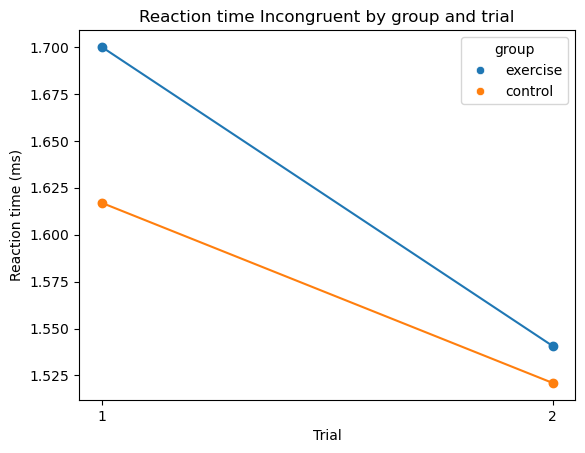

In [160]:
#connect the lines
plt.plot([1, 2], exerc, marker='o')
plt.plot([1, 2], contr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exerc + contr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Incongruent by group and trial')


Text(0.5, 1.0, 'Reaction time Congruent by group and trial')

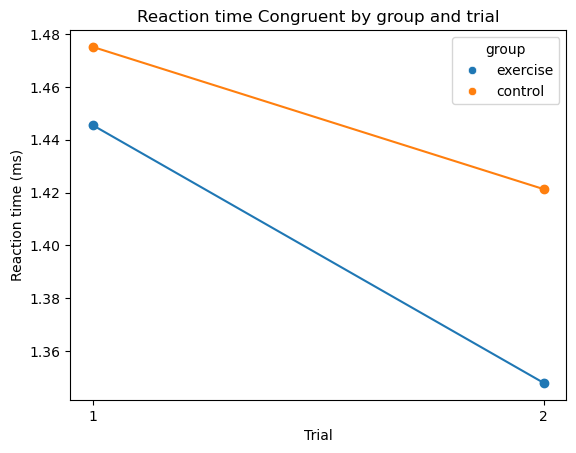

In [161]:
#connect the lines
plt.plot([1, 2], exercc, marker='o')
plt.plot([1, 2], contrr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exercc + contrr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Congruent by group and trial')

# box plot

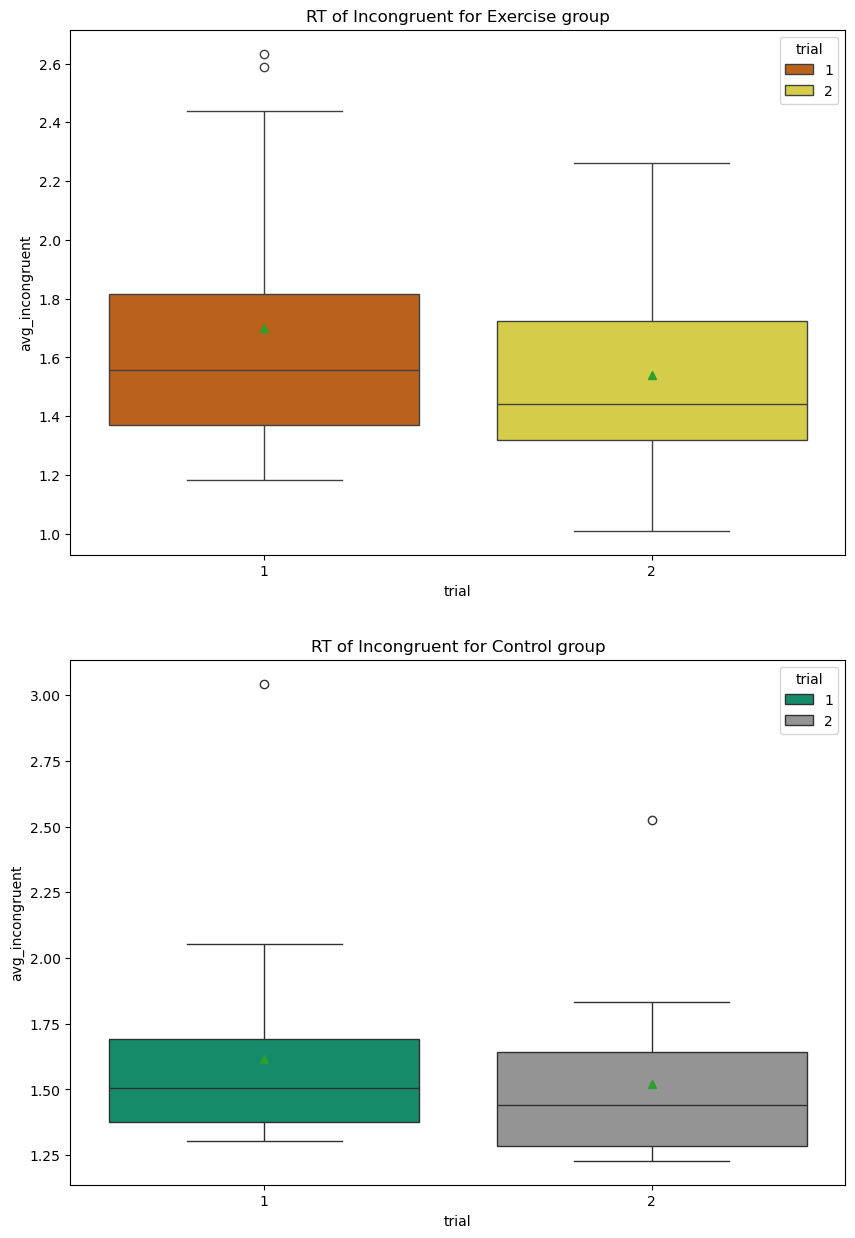

In [162]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxplot(x="trial", y="avg_incongruent", data=execise, ax=ax[0], hue='trial', palette=[colorblind_palette[3], colorblind_palette[8]], legend=True, showmeans=True)
ax[0].set_title("RT of Incongruent for Exercise group")
# sns.boxplot(x="trial", y="avg_congruent", data=execise, ax=ax[0, 1],hue='trial',palette=[colorblind_palette[3], colorblind_palette[8]], legend=False)
# ax[0, 1].set_title("RT of Congruent for Exercise group")

sns.boxplot(x="trial", y="avg_incongruent", data=control, ax=ax[1], hue='trial', palette=[colorblind_palette[2], colorblind_palette[7]], legend=True, showmeans=True)
ax[1].set_title("RT of Incongruent for Control group")
# sns.boxplot(x="trial", y="avg_congruent", data=control, ax=ax[1, 1],hue='trial',palette=[colorblind_palette[2], colorblind_palette[7]], legend=False)
# ax[1, 1].set_title("RT of Congruent for Control group")

plt.show()

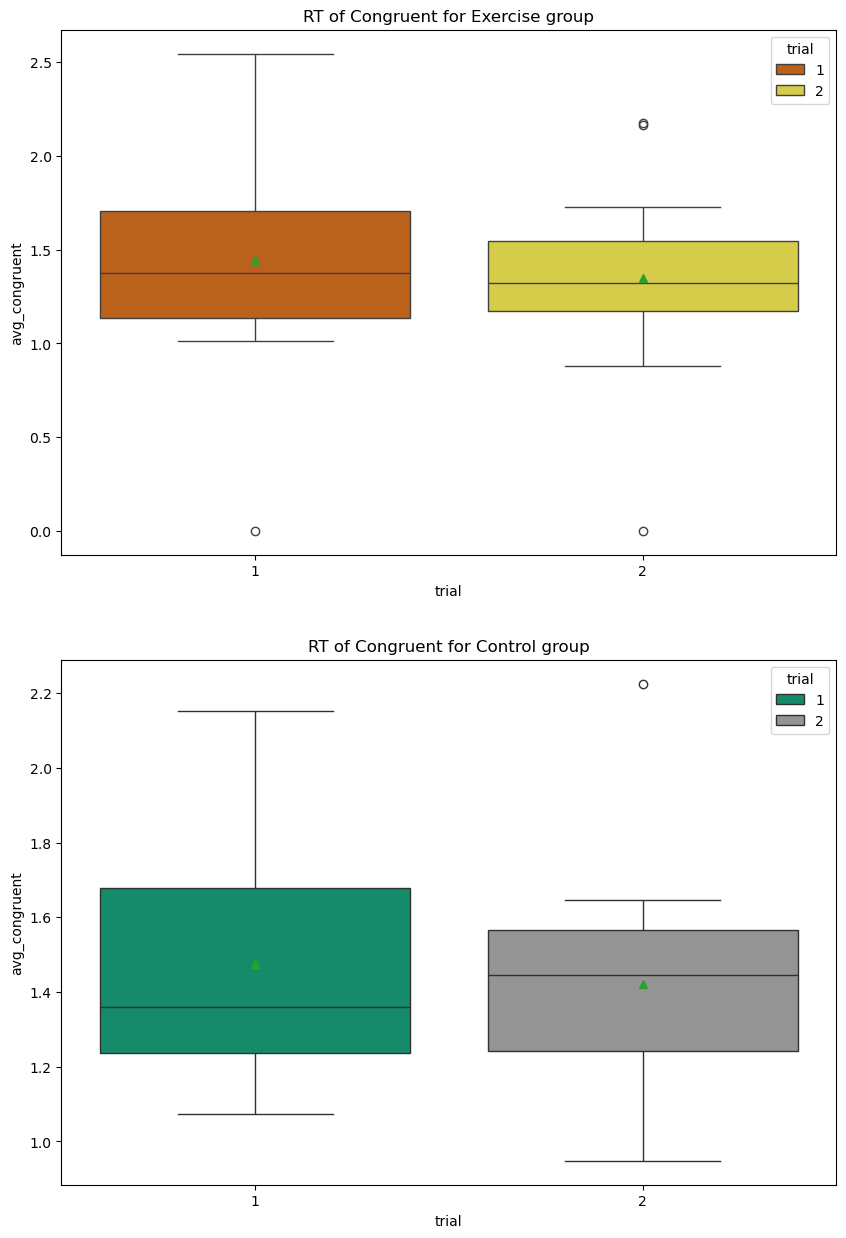

In [163]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxplot(x="trial", y="avg_congruent", data=execise, ax=ax[0], hue='trial', palette=[colorblind_palette[3], colorblind_palette[8]], legend=True, showmeans=True)
ax[0].set_title("RT of Congruent for Exercise group")


sns.boxplot(x="trial", y="avg_congruent", data=control, ax=ax[1], hue='trial', palette=[colorblind_palette[2], colorblind_palette[7]], legend=True, showmeans=True)
ax[1].set_title("RT of Congruent for Control group")


plt.show()

/tmp/ipykernel_13467/2801333809.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trial_group", y="avg_incongruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)
/tmp/ipykernel_13467/2801333809.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


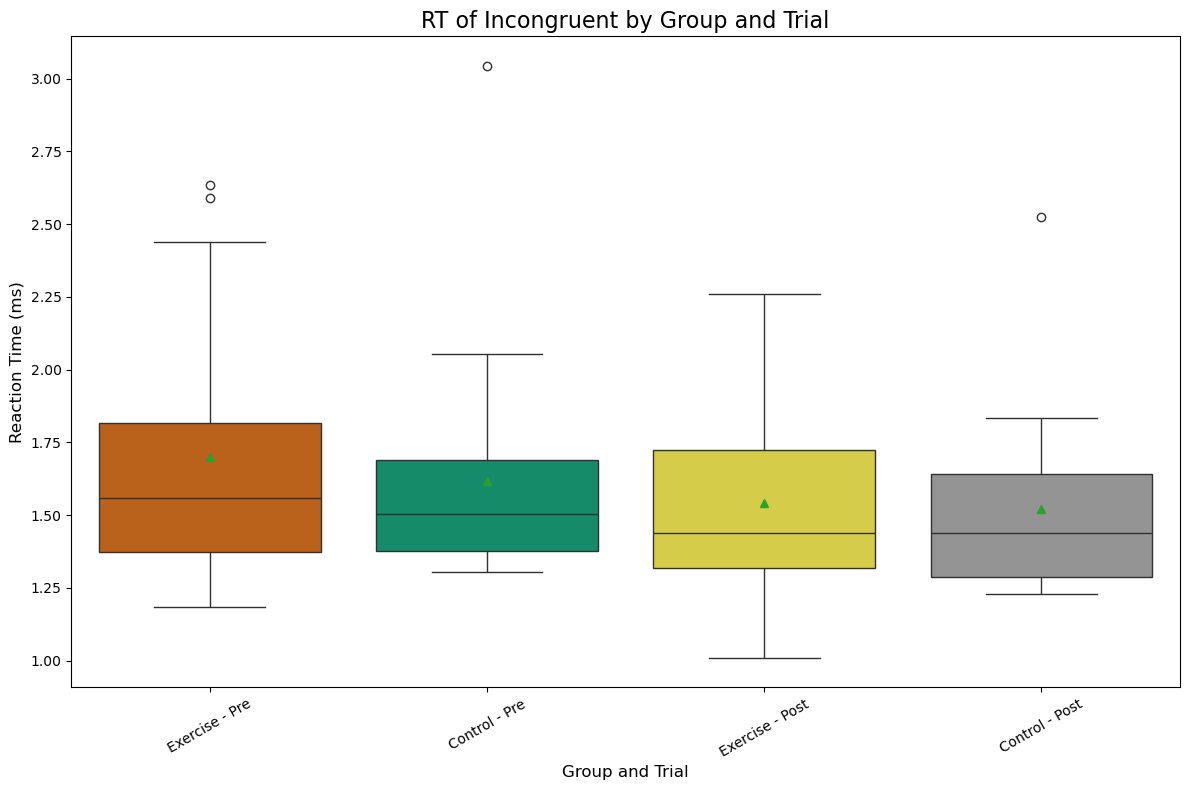

In [164]:
colorblind_palette = sns.color_palette("colorblind")

# Create a single subplot for all four boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Combine exercise and control groups for Trial 1 and Trial 2 into one DataFrame
plot_data = pd.concat([
    execise[execise["trial"] == 1].assign(trial_group="Exercise - Pre"),
    control[control["trial"] == 1].assign(trial_group="Control - Pre"),
    execise[execise["trial"] == 2].assign(trial_group="Exercise - Post"),
    control[control["trial"] == 2].assign(trial_group="Control - Post")
])

# Define colors for the four groups
box_colors = [colorblind_palette[3],  # Orange for Exercise - Trial 1
              colorblind_palette[2],  # Green for Control - Trial 1
              colorblind_palette[8],  # Yellow for Exercise - Trial 2
              colorblind_palette[7]]  # Gray for Control - Trial 2

# Plot all four boxplots on the same axis
sns.boxplot(x="trial_group", y="avg_incongruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)

# Customize the plot
ax.set_title("RT of Incongruent by Group and Trial", fontsize=16)
ax.set_xlabel("Group and Trial", fontsize=12)
ax.set_ylabel("Reaction Time (ms)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Show the plot
plt.tight_layout()
plt.show()



/tmp/ipykernel_13467/897777778.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trial_group", y="avg_congruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)
/tmp/ipykernel_13467/897777778.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


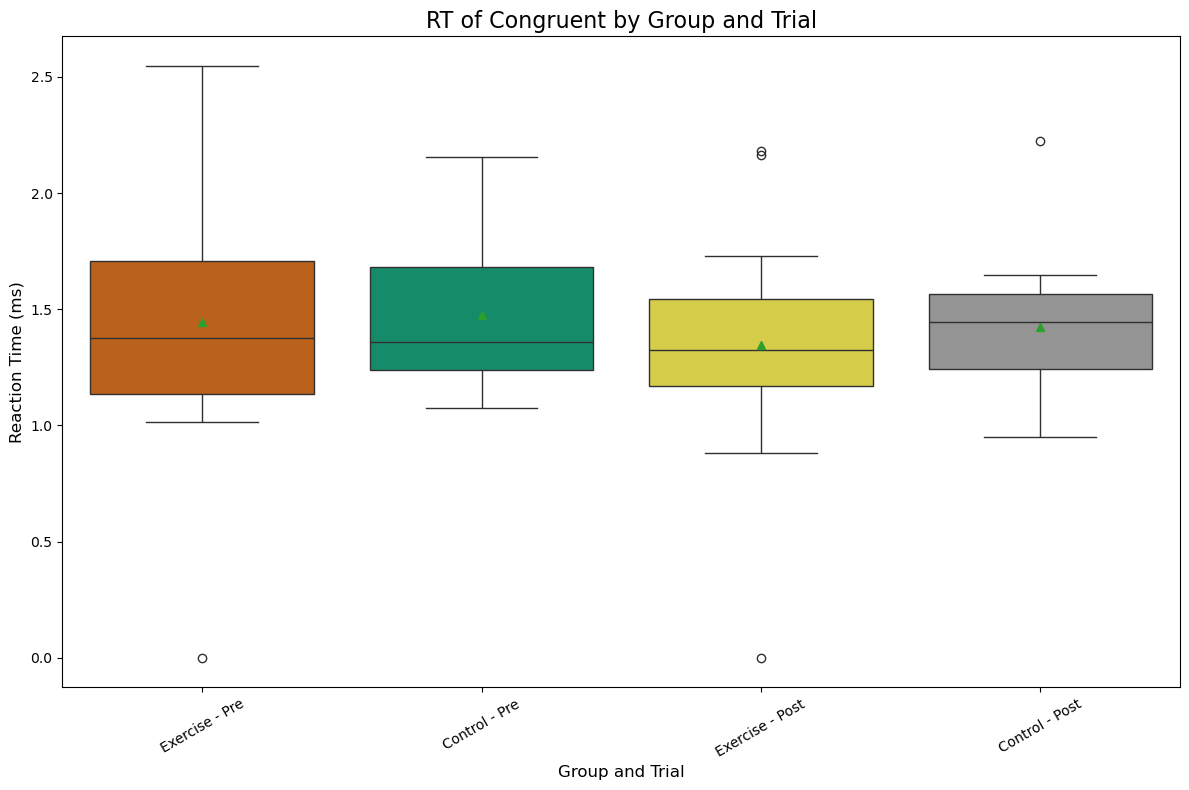

In [165]:
colorblind_palette = sns.color_palette("colorblind")

# Create a single subplot for all four boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Combine exercise and control groups for Trial 1 and Trial 2 into one DataFrame
plot_data = pd.concat([
    execise[execise["trial"] == 1].assign(trial_group="Exercise - Pre"),
    control[control["trial"] == 1].assign(trial_group="Control - Pre"),
    execise[execise["trial"] == 2].assign(trial_group="Exercise - Post"),
    control[control["trial"] == 2].assign(trial_group="Control - Post")
])

# Define colors for the four groups
box_colors = [colorblind_palette[3],  # Orange for Exercise - Trial 1
              colorblind_palette[2],  # Green for Control - Trial 1
              colorblind_palette[8],  # Yellow for Exercise - Trial 2
              colorblind_palette[7]]  # Gray for Control - Trial 2

# Plot all four boxplots on the same axis
sns.boxplot(x="trial_group", y="avg_congruent", data=plot_data, palette=box_colors, showmeans=True, ax=ax)

# Customize the plot
ax.set_title("RT of Congruent by Group and Trial", fontsize=16)
ax.set_xlabel("Group and Trial", fontsize=12)
ax.set_ylabel("Reaction Time (ms)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Show the plot
plt.tight_layout()
plt.show()


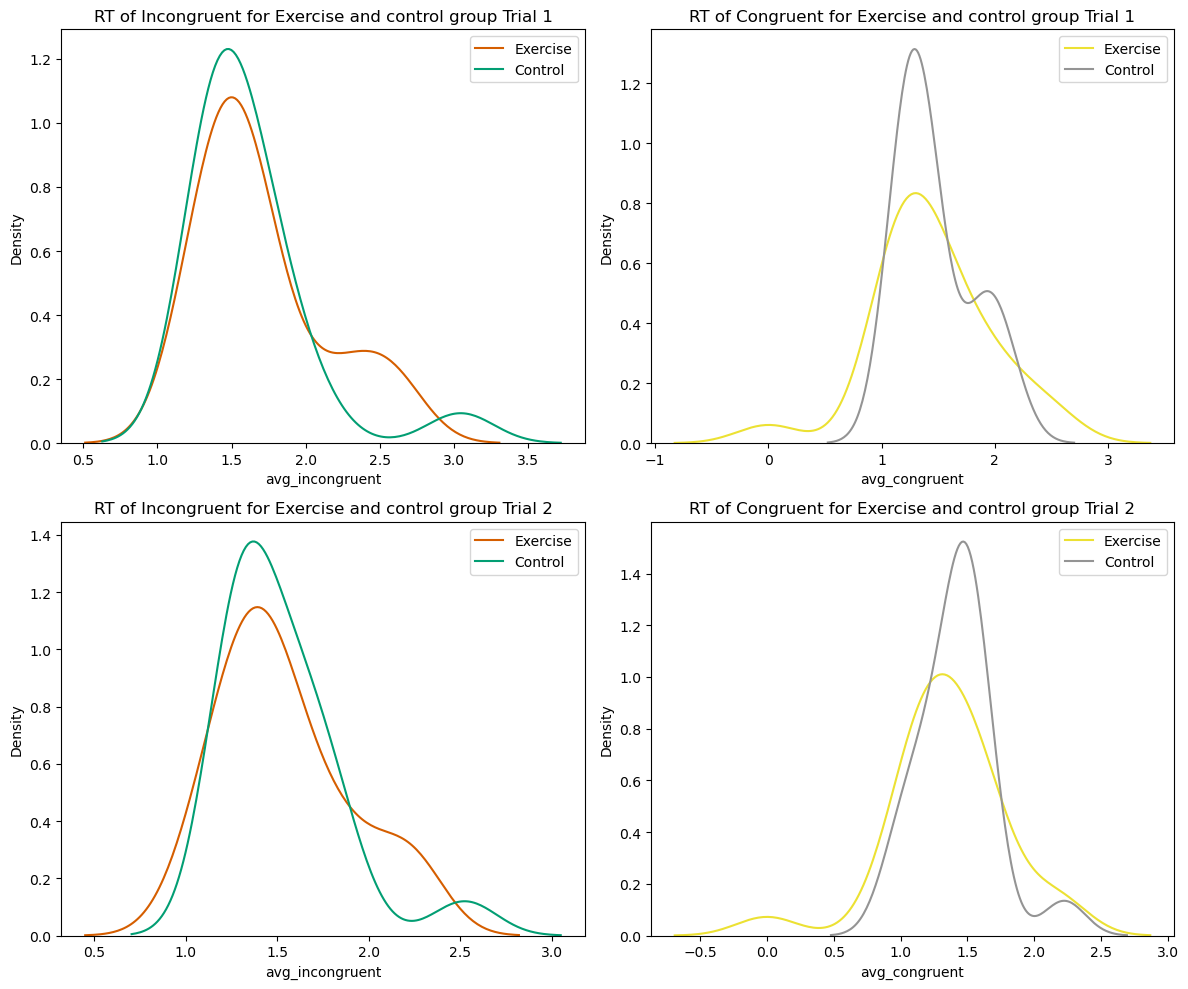

In [166]:
# Assuming execise is your DataFrame and colorblind_palette is defined
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_1["avg_incongruent"], ax=ax[0,0], color=colorblind_palette[3])
sns.kdeplot(control_1["avg_incongruent"], ax=ax[0,0], color=colorblind_palette[2])
ax[0,0].set_title("RT of Incongruent for Exercise and control group Trial 1")
ax[0,0].legend(["Exercise", "Control"])
# KDE plot for the 'avg_congruent' column
sns.kdeplot(exercise_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[8])
sns.kdeplot(control_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[7])
ax[0,1].set_title("RT of Congruent for Exercise and control group Trial 1")
ax[0,1].legend(["Exercise", "Control"])

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_2["avg_incongruent"], ax=ax[1,0], color=colorblind_palette[3])
sns.kdeplot(control_2["avg_incongruent"], ax=ax[1,0], color=colorblind_palette[2])
ax[1,0].set_title("RT of Incongruent for Exercise and control group Trial 2")
ax[1,0].legend(["Exercise", "Control"])

# KDE plot for the 'avg_congruent' column
sns.kdeplot(exercise_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[8])
sns.kdeplot(control_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[7])
ax[1,1].set_title("RT of Congruent for Exercise and control group Trial 2")
ax[1,1].legend(["Exercise", "Control"]) 


plt.tight_layout()
plt.show()

In [167]:
print(f"error rate for incon exercise 1 is  {1- exercise_1.acc_incongruent.mean()}")
print(f"error rate for incon control 1 is  {1- control_1.acc_incongruent.mean()}")
print(f"error rate for incon exercise 1 is  {1- exercise_2.acc_incongruent.mean()}")
print(f"error rate for incon control  1 is  {1- control_2.acc_incongruent.mean()}")

error rate for incon exercise 1 is  0.2333333333333334
error rate for incon control 1 is  0.21052631578947367
error rate for incon exercise 1 is  0.24791666666666667
error rate for incon control  1 is  0.2394736842105264


In [168]:
print(f"error rate for con exercise 1 is  {1- exercise_1.acc_congruent.mean()}")
print(f"error rate for con control 1 is  {1- control_1.acc_congruent.mean()}")
print(f"error rate for con exercise 1 is  {1- exercise_2.acc_congruent.mean()}")
print(f"error rate for con control  1 is  {1- control_2.acc_congruent.mean()}")

error rate for con exercise 1 is  0.7854166666666667
error rate for con control 1 is  0.8078947368421052
error rate for con exercise 1 is  0.7583333333333333
error rate for con control  1 is  0.781578947368421


In [169]:
print(f"avg rt for incongruent exercise 1 is {exercise_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 1 is {control_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent exercise 2 is {exercise_2.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 2 is {control_2.avg_incongruent.mean()}")

avg rt for incongruent exercise 1 is 1.7000315542777642
avg rt for incongruent control 1 is 1.6169708914847645
avg rt for incongruent exercise 2 is 1.5407066654405102
avg rt for incongruent control 2 is 1.5210130489228295


In [170]:
print(f"avg rt for congruent exercise 1 is {exercise_1.avg_congruent.mean()}")
print(f"avg rt for congruent control 1 is {control_1.avg_congruent.mean()}")
print(f"avg rt for congruent exercise 2 is {exercise_2.avg_congruent.mean()}")
print(f"avg rt for congruent control 2 is {control_2.avg_congruent.mean()}")

avg rt for congruent exercise 1 is 1.4454919650313176
avg rt for congruent control 1 is 1.4751633008032308
avg rt for congruent exercise 2 is 1.3478590250002966
avg rt for congruent control 2 is 1.4212760047979358


# Testing normality of data

In [171]:
from scipy.stats import shapiro
print(shapiro(exercise_1.avg_incongruent))
print(shapiro(control_1.avg_incongruent))
print(shapiro(exercise_2.avg_incongruent)) # the only one that is normally distributed
print(shapiro(control_2.avg_incongruent))

ShapiroResult(statistic=np.float64(0.8586202177996493), pvalue=np.float64(0.0031733690331023656))
ShapiroResult(statistic=np.float64(0.7090352073663095), pvalue=np.float64(7.137006441498088e-05))
ShapiroResult(statistic=np.float64(0.9223261377720138), pvalue=np.float64(0.06576354972160924))
ShapiroResult(statistic=np.float64(0.8055239203845341), pvalue=np.float64(0.0013762801157912285))


In [172]:
from scipy.stats import shapiro
exercise_1_clean = exercise_1["avg_congruent"].dropna()
control_1_clean = control_1["avg_congruent"].dropna()
exercise_2_clean = exercise_2["avg_congruent"].dropna()
print(shapiro(exercise_1_clean))
print(shapiro(control_1_clean))
print(shapiro(exercise_2_clean)) 
print(shapiro(control_2.avg_congruent)) # the only one that is normally distributed

ShapiroResult(statistic=np.float64(0.9354021695620194), pvalue=np.float64(0.12876509832003546))
ShapiroResult(statistic=np.float64(0.8672461713761528), pvalue=np.float64(0.012967917775261163))
ShapiroResult(statistic=np.float64(0.9110179561108037), pvalue=np.float64(0.03711159675728457))
ShapiroResult(statistic=np.float64(0.9115923954806111), pvalue=np.float64(0.07918467183602579))


p value < 0.05, Data is not normally distributed.

In [173]:
control_total = control_1.shape[0]

exercise_1 = exercise_1.iloc[:control_total]
exercise_2 = exercise_2.iloc[:control_total]
#merge the data
data_balanced = pd.concat([exercise_1, control_1, exercise_2, control_2])


In [174]:
df = data_balanced[["id", "group", "trial", "avg_incongruent"]]

model = smf.mixedlm("avg_incongruent ~ trial * group", df, groups=df["id"]).fit()

print(model.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    76       Method:              REML           
No. Groups:          38       Scale:               0.0213         
Min. group size:     2        Log-Likelihood:      -14.4605       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                1.713    0.109 15.724 0.000  1.499  1.926
group[T.exercise]        0.170    0.154  1.104 0.269 -0.132  0.472
trial                   -0.096    0.047 -2.029 0.042 -0.189 -0.003
trial:group[T.exercise] -0.088    0.067 -1.312 0.190 -0.219  0.043
Group Var                0.119    0.297                           



In [176]:
df = data[["id", "group", "trial", "avg_incongruent", "avg_congruent", "gender", "age", "time"]]

df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

df['hour'] = df['time'].dt.hour

# seperate the time into morning, afternoon, night
def categorize_time(hour):
    if 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(categorize_time)

# Fit the MLM model with trial, group, and their interaction as fixed effects, plus gender, age as covariates
model_mlm = smf.mixedlm("avg_incongruent ~ trial * group + gender + age + time_of_day", 
                         df, 
                         groups=df["id"]).fit()

# Print the MLM model summary
print(model_mlm.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    86       Method:              REML           
No. Groups:          43       Scale:               0.0201         
Min. group size:     2        Log-Likelihood:      -18.0371       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.659    0.577  4.608 0.000  1.528  3.790
group[T.exercise]        0.193    0.146  1.319 0.187 -0.094  0.479
gender[T.M]              0.165    0.121  1.363 0.173 -0.072  0.403
time_of_day[T.morning]  -0.052    0.130 -0.404 0.686 -0.306  0.201
time_of_day[T.night]     0.276    0.207  1.333 0.183 -0.130  0.682
trial     

/tmp/ipykernel_13467/505610907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
/tmp/ipykernel_13467/505610907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour
/tmp/ipykernel_13467/505610907.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Significant Effect of Trial. No Significant Group Differences. Non-significant Effects of Gender and Age and Time. No Significant Interaction Between Trial and Group. Random Effects: The random effect variance (Group Var) is suggesting there is some variability between participants.

In [177]:
df['group'] = df['group'].astype('category')
df['gender'] = df['gender'].astype('category')

# Define time categories (morning, afternoon, night)
def categorize_time(hour):
    if 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'

# Apply time categorization
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['time_of_day'] = df['hour'].apply(categorize_time)

# Clean the data (removing NaNs in 'avg_congruent')
df_clean = df.dropna(subset=["avg_congruent"])

# Explicitly convert 'time_of_day' to categorical
df_clean['time_of_day'] = df_clean['time_of_day'].astype('category')

# Fit the mixed-effects model
model_mlmc = smf.mixedlm("avg_congruent ~ trial * group + gender + age + time_of_day", 
                         df_clean, 
                         groups=df_clean["id"]).fit()

# Print the summary
print(model_mlmc.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   avg_congruent
No. Observations:    86        Method:               REML         
No. Groups:          43        Scale:                0.0769       
Min. group size:     2         Log-Likelihood:       -44.3450     
Max. group size:     2         Converged:            Yes          
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.214    0.583  3.797 0.000  1.071  3.356
group[T.exercise]        0.065    0.211  0.309 0.758 -0.349  0.479
gender[T.M]              0.252    0.118  2.141 0.032  0.021  0.483
time_of_day[T.morning]  -0.095    0.126 -0.753 0.451 -0.342  0.152
time_of_day[T.night]     0.264    0.202  1.307 0.191 -0.132  0.659
trial     

/tmp/ipykernel_13467/2946400151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/tmp/ipykernel_13467/2946400151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('category')
/tmp/ipykernel_13467/2946400151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Lack of data in congruent part, it shows gender and age affect most.

In [178]:
# Separate data by group
exercise_group = data[data['group'] == 'exercise']
control_group = data[data['group'] == 'control']

# Separate data by trial within each group
exercise_1 = exercise_group[exercise_group['trial'] == 1]  # trial 1 for exercise group
exercise_2 = exercise_group[exercise_group['trial'] == 2]  # trial 2 for exercise group
control_1 = control_group[control_group['trial'] == 1]  # trial 1 for control group
control_2 = control_group[control_group['trial'] == 2]  # trial 2 for control group

# --- 1. Mann-Whitney U Test (between-group comparisons) ---
# Compare the 'avg_incongruent' between exercise and control groups for trial 1 (pre-exercise)
stat, p_value = mannwhitneyu(exercise_1['avg_incongruent'], control_1['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 1):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare the 'avg_incongruent' between exercise and control groups for trial 2 (post-exercise)
stat, p_value = mannwhitneyu(exercise_2['avg_incongruent'], control_2['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# --- 2. Wilcoxon Signed-Rank Test (within-subject comparisons) ---
# Compare within the exercise group (trial 1 vs trial 2)
stat, p_value = wilcoxon(exercise_1['avg_incongruent'], exercise_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare within the control group (trial 1 vs trial 2)
stat, p_value = wilcoxon(control_1['avg_incongruent'], control_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")


Mann-Whitney U Test (Exercise vs Control - Trial 1):
Statistic: 254.0, p-value: 0.5328752778295125

Mann-Whitney U Test (Exercise vs Control - Trial 2):
Statistic: 235.0, p-value: 0.8736982642463526

Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):
Statistic: 41.0, p-value: 0.001092672348022461

Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):
Statistic: 36.0, p-value: 0.015972137451171875



The Mann-Whitney U Tests show no significant between-group differences in reaction times for both trials.
The Wilcoxon Signed-Rank Tests show significant within-group changes, indicating that both the exercise group and the control group exhibit significant differences in reaction times between trials.

In [179]:
from statsmodels.stats.power import FTestAnovaPower

# Assume the effect size is 0.02 (small effect), significance level is 0.05, and statistical power is 0.8
effect_size = 0.1  # Cohen’s f² value 
alpha = 0.05  # Significance level (commonly set to 0.05)
power = 0.80  # Statistical power (commonly set to 0.80)

# Create an object for power analysis (ANOVA F-test)
anova_power = FTestAnovaPower()

# Estimate the required sample size (assuming 1 fixed effects and 2 groups for comparison)
# Here, we are calculating the required sample size for ANOVA (for a mixed-effects model, the sample size estimation would require different methods)
required_sample_size = anova_power.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=2)  # k_groups indicates the number of groups in the comparison

# Print the required sample size, rounded up to the nearest integer
print(f"Required sample size: {np.ceil(required_sample_size)}")




Required sample size: 787.0
